> This is the first of in total 3 exercises which are examinated within the lecture "Solarthermische Kraftwerke" at Technische Universität München

# First Exercise

In this first exercise we will process time series data for renewable energy generation technologies. Additionally we will investigate the .epw weather file format and assess which information is useful for concentrating solar power plants.

## Import required packages

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import weather data

The weather data is defined by an [.epw file](https://climate.onebuilding.org/papers/EnergyPlus_Weather_File_Format.pdf), a commonly used data format for the open-source simulation software [Energy Plus](https://energyplus.net/). It is a text file with a standardized structure fit for weather information. The files can be downloaded from several sources. In our case the data was downloaded from [PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/de/#PVTR)

The data is obtained from weather satellites, either [SARAH2](https://joint-research-centre.ec.europa.eu/photovoltaic-geographical-information-system-pvgis/pvgis-data-download/sarah-2-solar-radiation-data_en) or ERA5, which have detailed meteorological data for several years. This data is sometimes processed to so-called Typical Meteorological Years (TMY):
>A typical meteorological year (TMY) is a set of meteorological data with data values for every hour in a year for a given geographical location. The data are selected from hourly data in a longer time period (normally 10 years or more). The TMY tool can be used to interactively visualise all the data or to download the data as a text file.
Source: PVGIS help

# Question 0 
1. Open the .epw file in the text editor and check out the exact location (located in the header of the epw file), where the data is collectet on the sattelite map. What can you see?
> GPS Location: 37.562000,-5.330000
2. What is the unit for the single columns?
    - Radiation: 
    - Wind Speed:
    - Dry Bulb Temperature:
>   - Radiation: Wh/m^2
    - Wind Speed: m/s
    - Dry Bulb Temperature: °C


## Question 1

Open the `./data/tmy_37.562_-5.330_2005_2020-sarah2.epw` weather file of the
location in Granada, Spain, with the text editor of your choice and list the
information which could be useful to simulate: 

1. Photovoltaics
2. Solar Thermal
3. Concentrating Solar Thermal

### 1.1 Read ewp file

In [19]:
# These are the column names as defined for an epw file. Refer to the
# documentation to check them
EPW_COLUMNS = (
    'Year',
    'Month',
    'Day',
    'Hour',
    'Minute',
    'Data Source and Uncertainty Flags',
    'Dry Bulb Temperature',
    'Dew Point Temperature',
    'Relative Humidity',
    'Atmospheric Station Pressure',
    'Extraterrestrial Horizontal Radiation',
    'Extraterrestrial Direct Normal Radiation',
    'Horizontal Infrared Radiation Intensity',
    'Global Horizontal Radiation',
    'Direct Normal Radiation',
    'Diffuse Horizontal Radiation',
    'Global Horizontal Illuminance',
    'Direct Normal Illuminance',
    'Diffuse Horizontal Illuminance',
    'Zenith Luminance',
    'Wind Direction',
    'Wind Speed',
    'Total Sky Cover',
    'Opaque Sky Cover',
    'Visibility',
    'Ceiling Height',
    'Present Weather Observation',
    'Present Weather Codes',
    'Precipitable Water',
    'Aerosol Optical Depth',
    'Snow Depth',
    'Days Since Last Snowfall',
    'Albedo',
    'Liquid Precipitation Depth',
    'Liquid Precipitation Quantity'
)

In [20]:
# here, we read the textfile and decide to skip non-tabular data at the
# beginning of the file. Additionally, we define a header (column names)
df = pd.read_csv('./data/tmy_37.562_-5.330_2005_2020-sarah2.epw',
                           skiprows=8,
                           sep=',', decimal='.',
                           header=None,
                           names=EPW_COLUMNS)

In [21]:
df.head()

,Year,Month,Day,Hour,Minute,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,...,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
0,2005,1,1,1,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.99,2.43,75.55,101048.68,...,99999,9,999999999,999,0.999,999,99,999,999,99
1,2005,1,1,2,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.03,2.27,79.36,101048.68,...,99999,9,999999999,999,0.999,999,99,999,999,99
2,2005,1,1,3,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.07,2.11,83.18,100999.68,...,99999,9,999999999,999,0.999,999,99,999,999,99
3,2005,1,1,4,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,4.10,1.95,87.00,100989.88,...,99999,9,999999999,999,0.999,999,99,999,999,99
4,2005,1,1,5,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,3.14,1.79,90.82,100989.88,...,99999,9,999999999,999,0.999,999,99,999,999,99


### 1.2  Check the length with `shape[]` and compare to the hours per year. In your own words, what is probably contained in the dataset ?

In [22]:
# gives the total sum of column 1 (Index = 0 in python)
df.shape[0]

8760

In [23]:
# hours per year
print(365*24)

8760


>Anwser: The shape of the dataframe column is 8760, which equals the number of hours in a year.

### 1.3 Visualize all `column` names

In [24]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover', 'Visibility', 'Ceiling Height',
       'Present Weather Observation', 'Present Weather Codes',
       'Precipitable Water', 'Aerosol Optical Depth', 'Snow Depth',
       'Days Since Last Snowfall', 'Albedo', 'Liquid Precipitation Depth',
       'Liquid Precipitation Quantity'],
      dtype='object')

### 1.4 Visualize with `unique`comand the unique entries in the column years
The datetime contains multiple years depending on the month. Why is that?

In [25]:
df["Year"].unique()

array([2005, 2006, 2009, 2012, 2010, 2013, 2017, 2019, 2011])

> Answer: Typical meteorological year (TMY) is a collation of selected weather data for a specific location, listing hourly values of solar radiation and meteorological elements for a one-year period. The values are generated from a data bank much longer than a year in duration, at least 12 years. It is specially selected so that it presents the range of weather phenomena for the location in question, while still giving annual averages that are consistent with the long-term averages for the location in question. [https://en.wikipedia.org/wiki/Typical_meteorological_year]

### 1.5 Create new `dataframe` and set the column `"Year"` to a value of your choice
This is for better postprocessing.

In [26]:
# set the read dataframe to a new dataframe
df_2000 =df
# sets the year column to 2000 (it is just a placeholder for simplification in post processing and plotting)
df_2000["Year"] = 2000

> There is also an other option to set all years in the dataframe the same. You can choose which one is better for you.

### 1.6 Use pandas `to_datetime` to set an `index`

In [27]:
# index the dataframe by the datetime
# sets the colums 'Year', 'Month', 'Day', 'Hour', 'Minute' of df_2000 as an index of the dataframe
df_2000['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2000.set_index('datetime', inplace=True)

### 1.7 Visualize the dataframe and have a look at columns and rows. Which columns provide congruent/redundant information after the previous preprocessing steps?

In [28]:
# Information in the index and the columns 'year', 'month', 'day', 'hour', 'minute' are redundant
df_2000.head()

,Year,Month,Day,Hour,Minute,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,...,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 01:00:00,2000,1,1,1,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.99,2.43,75.55,101048.68,...,99999,9,999999999,999,0.999,999,99,999,999,99
2000-01-01 02:00:00,2000,1,1,2,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.03,2.27,79.36,101048.68,...,99999,9,999999999,999,0.999,999,99,999,999,99
2000-01-01 03:00:00,2000,1,1,3,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.07,2.11,83.18,100999.68,...,99999,9,999999999,999,0.999,999,99,999,999,99
2000-01-01 04:00:00,2000,1,1,4,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,4.10,1.95,87.00,100989.88,...,99999,9,999999999,999,0.999,999,99,999,999,99
2000-01-01 05:00:00,2000,1,1,5,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,3.14,1.79,90.82,100989.88,...,99999,9,999999999,999,0.999,999,99,999,999,99


### 1.8 Visualize all column names in your dataframe as an index object for easy copy-pasting later on 

In [29]:
df_2000.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover', 'Visibility', 'Ceiling Height',
       'Present Weather Observation', 'Present Weather Codes',
       'Precipitable Water', 'Aerosol Optical Depth', 'Snow Depth',
       'Days Since Last Snowfall', 'Albedo', 'Liquid Precipitation Depth',
       'Liquid Precipitation Quantity'],
      dtype='object')

### 1.9 Tidy up the data set. Use the command `drop` to drop empty columns and safe to new dataframe.

For better understanding, which column has missing values/is empty check the [.epw file documentation](https://climate.onebuilding.org/papers/EnergyPlus_Weather_File_Format.pdf)

In [31]:
# Drop the columns that are empty by definition of the epw dokumentation
# Dops the columns 'Year', 'Month', 'Day', 'Hour', 'Minute' of df_2000, because
# Index is already set and this columns would provide no further information
df_2000_clean = df_2000.drop(
    columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
# As declared in the docuemntation of the epw file, the following columns are empty and can be dropped
df_2000_clean = df_2000_clean.drop(
    columns=['Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation','Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance','Total Sky Cover',
       'Opaque Sky Cover',
       'Visibility', 'Ceiling Height','Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'])

### 1.10 Visualize the created dataframe

In [32]:
df_2000_clean.head()

,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,Diffuse Horizontal Radiation,Wind Direction,Wind Speed
datetime,,,,,,,,,,,
2000-01-01 01:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.99,2.43,75.55,101048.68,252.80,0.0,-0.0,0.0,72,1.2
2000-01-01 02:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.03,2.27,79.36,101048.68,250.58,0.0,-0.0,0.0,70,1.2
2000-01-01 03:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.07,2.11,83.18,100999.68,248.36,0.0,-0.0,0.0,76,1.3
2000-01-01 04:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,4.10,1.95,87.00,100989.88,246.14,0.0,-0.0,0.0,73,1.3
2000-01-01 05:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,3.14,1.79,90.82,100989.88,243.91,0.0,-0.0,0.0,57,1.4


### 1.11 Typical design values of the wind speed parameter are 34 to 41 m/s, assumed for a 30- or 50-year wind gust. What is the maximum and minimum wind speed in the data set? Does it deviate significantly from the design parameter, and if so, why?

In [33]:
df_2000_clean["Wind Speed"]

datetime
2000-01-01 01:00:00    1.2
2000-01-01 02:00:00    1.2
2000-01-01 03:00:00    1.3
2000-01-01 04:00:00    1.3
2000-01-01 05:00:00    1.4
                      ... 
2000-12-31 20:00:00    1.0
2000-12-31 21:00:00    1.0
2000-12-31 22:00:00    1.1
2000-12-31 23:00:00    1.1
2001-01-01 00:00:00    1.2
Name: Wind Speed, Length: 8760, dtype: float64

In [34]:
# Minimum value of 'wind speed' in the dataframe
df_2000_clean['Wind Speed'].min()

np.float64(0.0)

In [35]:
# Maximum value of 'wind speed' in the dataframe
df_2000_clean['Wind Speed'].max()

np.float64(9.9)

## Question 2 - Dealing with time series data

### 2.1 Time series data contains lots of information with high temporal resolution. Plotting it is generally a good first step to getting and overview. Choose the `'Dry Bulb Temperature'`for the first plot. What can be seen?

Hint: use the pandas .plot() method or plot with matplotlib.pyplot

<Axes: xlabel='Time', ylabel='Temperature I°C)'>

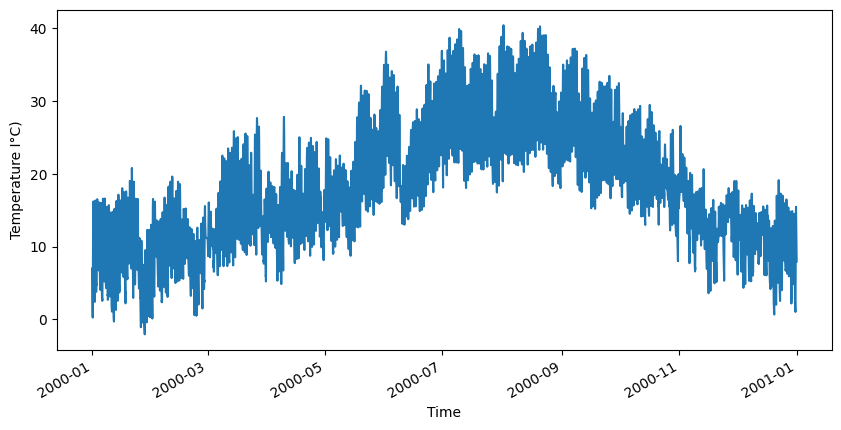

In [39]:
# Plots the dry bulb temperature of the dataframe and gives labels and a titel
df_2000_clean["Dry Bulb Temperature"].plot(
    xlabel='Time',
    ylabel='Temperature I°C)',
    figsize=(10,5)
    )

# > it can be seen that the resolution is very high, because of the hourly data. 

### 2.2 To get a better overview plot the mean daily Dry Bulb Temperature.

Helpful functions: 
- resample()
- mean()

<Axes: xlabel='Time', ylabel='Temperature in °C'>

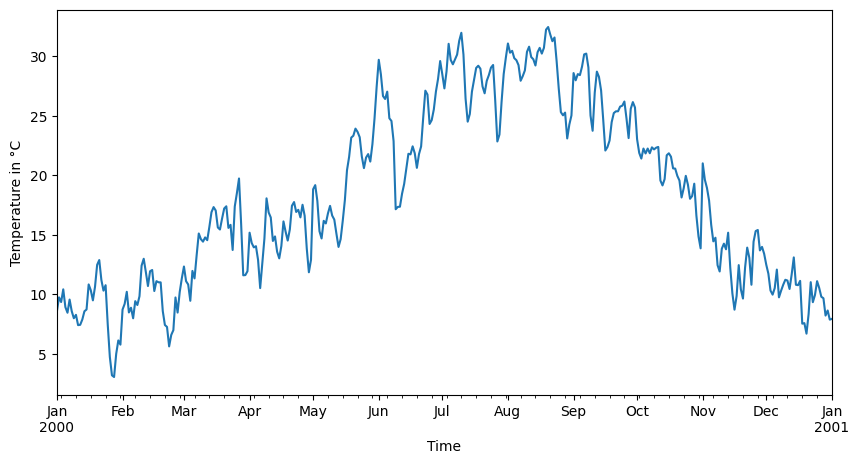

In [40]:
df_2000_clean["Dry Bulb Temperature"].resample("D").mean().plot(
    xlabel='Time',
    ylabel='Temperature in °C',
    figsize=(10,5))

### 2.3 Plot all available radiation types 

<Axes: xlabel='Time', ylabel='Radiation in Wh/m²'>

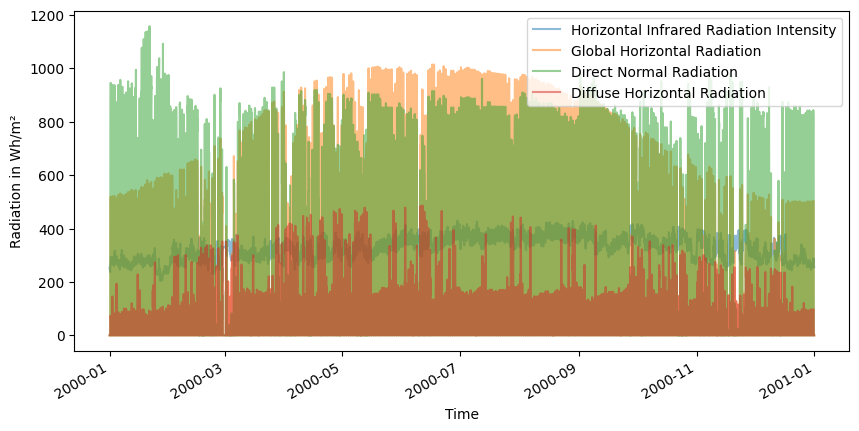

In [41]:
# Plots all Radiation columns of the dataframe 
df_2000_clean.filter(like='Radiation').plot(
    xlabel='Time',
    ylabel='Radiation in Wh/m²',
    figsize=(10,5),
    alpha=0.5)
# It is the same problem as with the temperature, the resolution is very high, because of the hourly data.

### 2.4 Plot the mean values of the available radiation

Hint: use the method `resample()`

<Axes: xlabel='Time', ylabel='Radiation in Wh/m²'>

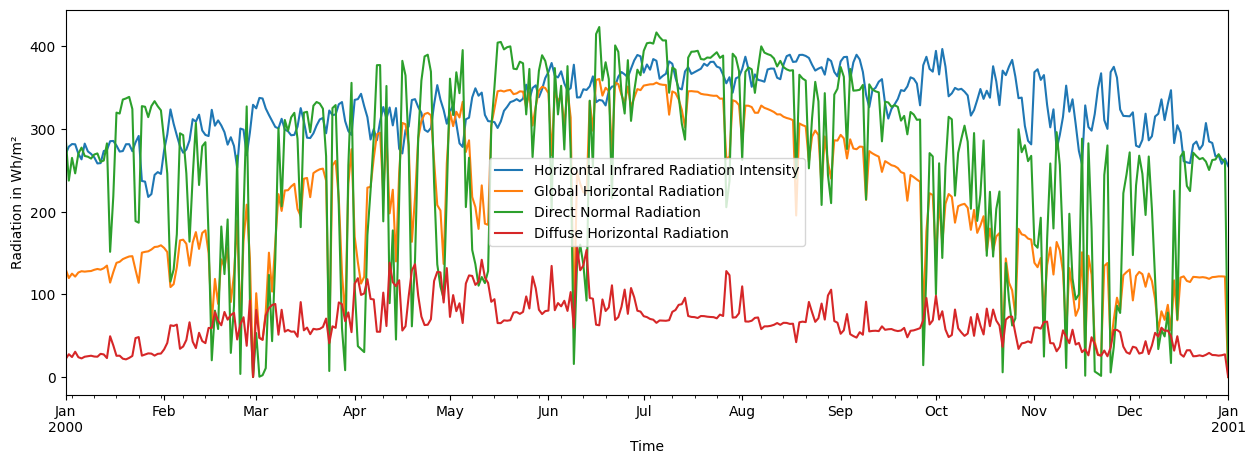

In [ ]:
# Plots all Radiation columns of the dataframe averaged intraday
df_2000_clean.filter(like='Radiation').resample("D").mean().plot(
    xlabel='Time',
    ylabel='Mean Radiation in Wh/m²',
    figsize=(15,5))
# It is the same problem as with the temperature, the resolution is very high, because of the hourly data.

### 2.5 Plot the monthly sum of incoming radiation

([<matplotlib.axis.XTick at 0x1fae6a82210>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December'),
  Text(12, 0, 'January')])

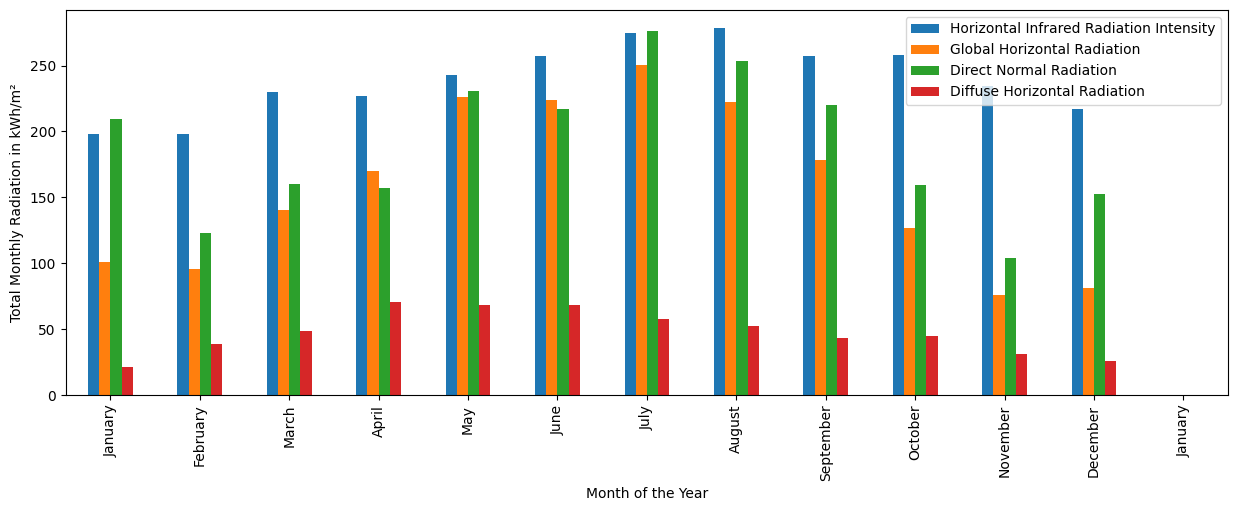

In [45]:
# Plots all Radiation columns of the dataframe averaged by week
(df_2000_clean.filter(like='Radiation').resample("ME").sum() / 1e3).plot(
    kind='bar',
    xlabel='Month of the Year',
    ylabel='Total Monthly Radiation in kWh/m²',
    figsize=(15,5))
# It is the same problem as with the temperature, the resolution is very high, because of the hourly data.
# label x axis ticks with the month names
plt.xticks(
    ticks = np.arange(0, len(df_2000_clean.filter(like='Radiation').resample("ME").sum()), step=1),
    labels = df_2000_clean.filter(like='Radiation').resample("ME").sum().index.strftime('%B')
    )

### 2.6 Which radiation has the largest fluctuation during the year? 

> Direct Normal Radiation

### 2.7 Calculate the fluctuation with statistical indicators 

Hint: standard deviation, variance

In [ ]:
# This is not congruent with the visualisation of the plot before. Why is the solution 'Direct Normal Radiation'?
# this gives the column with the highest standard deviation of the radiation columns in df_2000_clean
max_std = [df_2000_clean.filter(like='Radiation').std().idxmax(),
           df_2000_clean.filter(like='Radiation').std().max()]
print(max_std)

['Direct Normal Radiation', 341.3529012926743]


In [ ]:
# This visualizes the standard deviation of the radiation columns in df_2000_clean
df_2000_clean.filter(like='Radiation').std()

Horizontal Infrared Radiation Intensity     42.903412
Global Horizontal Radiation                298.311527
Direct Normal Radiation                    341.352901
Diffuse Horizontal Radiation                88.302797
dtype: float64

In [ ]:
# This gives the variance of the radiation columns in df_2000_clean
max_var = [df_2000_clean.filter(like='Radiation').var().idxmax(),
           df_2000_clean.filter(like='Radiation').var().max()]
print(max_var)

['Direct Normal Radiation', 116521.80322092625]


In [ ]:
# This visualizes the variation of the radiation columns in df_2000_clean
df_2000_clean.filter(like='Radiation').var()

Horizontal Infrared Radiation Intensity      1840.702750
Global Horizontal Radiation                 88989.767334
Direct Normal Radiation                    116521.803221
Diffuse Horizontal Radiation                 7797.384003
dtype: float64

### 2.8 Is there any incongruence between the first visual assessment and the mathematical?

> Because of the high fluctuation in the Direct Normal Radiation, the mathematical and the visual analys show the same result. 

### 2.9 What is the difference between the radiation types and which are converted in solar technologies:

1. Photovoltaics
2. Solar Thermal
3. Concentrating Solar Thermal

1. Horizontal Infrared Radiation Intensity

    >Horizontal Infrared Radiation Intensity refers to the infrared portion of the solar spectrum that is received on a horizontal surface. Infrared radiation is part of the electromagnetic spectrum with wavelengths longer than visible light and is associated with heat. This measurement is important for understanding the thermal impact of solar radiation on surfaces, which can affect both natural and man-made environments.

2. Global Horizontal Radiation (GHI)

    >Global Horizontal Radiation (GHI) is the total amount of solar radiation received per unit area on a horizontal surface. It includes:
    Direct Normal Radiation (DNI): The direct solar radiation coming in a straight line from the sun.
    Diffuse Horizontal Radiation (DHI): The solar radiation that has been scattered by molecules and particles in the atmosphere and comes from all directions of the sky.
    GHI is a critical parameter for solar energy systems, particularly for photovoltaic (PV) panels that are typically mounted horizontally or at a fixed angle.

3. Direct Normal Radiation (DNI)

    >Direct Normal Radiation (DNI) is the amount of solar radiation received per unit area by a surface that is always held perpendicular (or normal) to the incoming rays of the sun. This type of radiation is crucial for concentrating solar power (CSP) systems, which use mirrors or lenses to focus sunlight onto a small area to generate high temperatures and produce electricity.

4. Diffuse Horizontal Radiation (DHI)

    >Diffuse Horizontal Radiation (DHI) is the solar radiation received by a horizontal surface that comes from all parts of the sky, excluding the direct rays of the sun. It results from scattering by air molecules, aerosols, and clouds. DHI is an important component of GHI, particularly on cloudy or overcast days when direct sunlight is blocked.
    Summary
    Horizontal Infrared Radiation Intensity: Measures the heat energy from infrared radiation on a horizontal surface.
    Global Horizontal Radiation (GHI): Total solar radiation (direct + diffuse) received on a horizontal surface.
    Direct Normal Radiation (DNI): Solar radiation received on a surface perpendicular to the sun's rays, used in CSP systems.
    Diffuse Horizontal Radiation (DHI): Scattered solar radiation received on a horizontal surface from all sky directions.

## 3. Comparison of the solar potential of two locations

### 3.1 Load the weatherfile of your own [hometown](https://climate.onebuilding.org/WMO_Region_6_Europe/default.html) or load the sample from Garching, Germany `'./data/tmy_48.264_11.670_2005_2020.epw'`

In [ ]:
# initialize the epw object
weather_file_2 = epw()
# read in the epw file
weather_file_2.read('./data/tmy_48.264_11.670_2005_2020.epw')

### 3.2 Convert the ewp object to pandas dataframes

In [ ]:
df_2 =pd.DataFrame(weather_file_2.dataframe)
df_2.head()

,Year,Month,Day,Hour,Minute,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,...,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
0,2007,1,1,1,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.56,2.52,82.09,96885.21,...,99999,9,999999999,999,0.999,999,99,999,999,99
1,2007,1,1,2,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.00,2.50,79.48,96819.03,...,99999,9,999999999,999,0.999,999,99,999,999,99
2,2007,1,1,3,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.44,2.48,76.87,96715.04,...,99999,9,999999999,999,0.999,999,99,999,999,99
3,2007,1,1,4,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.88,2.46,74.26,96611.04,...,99999,9,999999999,999,0.999,999,99,999,999,99
4,2007,1,1,5,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,7.32,2.44,71.66,96554.32,...,99999,9,999999999,999,0.999,999,99,999,999,99


### 3.3 Analyze the data of the new location and compare it to Granada, Spain

Have a detailed look on the radiation types at the two different locations. What can be seen? Which one has a greater potential for the different solar technologies listed in question 2.9?

In [ ]:
# Shows the number of rows in the dataframe
df_2.shape[0]

8760

In [ ]:
# Shows the unique values in the column 'Year'
df_2["Year"].unique()

array([2007, 2016, 2011, 2018, 2010, 2017, 2014, 2015], dtype=int64)

In [ ]:
df_2_2000 =df_2
# Setting all values to 2000, because the year is not relevant for the analysis. Definition of typical meteorological year
df_2_2000["Year"] = 2000
df_2_2000.head()

,Year,Month,Day,Hour,Minute,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,...,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
0,2000,1,1,1,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.56,2.52,82.09,96885.21,...,99999,9,999999999,999,0.999,999,99,999,999,99
1,2000,1,1,2,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.00,2.50,79.48,96819.03,...,99999,9,999999999,999,0.999,999,99,999,999,99
2,2000,1,1,3,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.44,2.48,76.87,96715.04,...,99999,9,999999999,999,0.999,999,99,999,999,99
3,2000,1,1,4,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.88,2.46,74.26,96611.04,...,99999,9,999999999,999,0.999,999,99,999,999,99
4,2000,1,1,5,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,7.32,2.44,71.66,96554.32,...,99999,9,999999999,999,0.999,999,99,999,999,99


In [ ]:
df_2_2000.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Data Source and Uncertainty Flags', 'Dry Bulb Temperature',
       'Dew Point Temperature', 'Relative Humidity',
       'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation',
       'Horizontal Infrared Radiation Intensity',
       'Global Horizontal Radiation', 'Direct Normal Radiation',
       'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover',
       'Opaque Sky Cover (used if Horizontal IR Intensity missing)',
       'Visibility', 'Ceiling Height', 'Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity'],
      dtype='obj

In [ ]:
df_2_2000['datetime'] = pd.to_datetime(df_2[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2_2000_clean = df_2_2000.drop(
    columns=
       ['Year', 'Month', 'Day', 'Hour', 'Minute','Present Weather Observation',
       'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth',
       'Snow Depth', 'Days Since Last Snowfall', 'Albedo',
       'Liquid Precipitation Depth', 'Liquid Precipitation Quantity', 'Global Horizontal Illuminance',
       'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
       'Zenith Luminance','Extraterrestrial Horizontal Radiation',
       'Extraterrestrial Direct Normal Radiation','Total Sky Cover',
       'Opaque Sky Cover',
       'Visibility', 'Ceiling Height'])

In [ ]:
# Set new index to datetime
df_2_2000_clean.set_index('datetime', inplace=True)
# Show the first 5 rows of the cleaned dataframe
df_2_2000_clean.head()

,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,Diffuse Horizontal Radiation,Wind Direction,Wind Speed
datetime,,,,,,,,,,,
2000-01-01 01:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.56,2.52,82.09,96885.21,327.07,0.0,-0.0,0.0,211,3.4
2000-01-01 02:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.00,2.50,79.48,96819.03,327.36,0.0,-0.0,0.0,236,3.6
2000-01-01 03:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.44,2.48,76.87,96715.04,327.65,0.0,-0.0,0.0,238,3.8
2000-01-01 04:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.88,2.46,74.26,96611.04,327.94,0.0,-0.0,0.0,238,4.0
2000-01-01 05:00:00,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,7.32,2.44,71.66,96554.32,328.23,0.0,-0.0,0.0,240,4.2


<Axes: title={'center': 'Radiation Germany'}, xlabel='Time', ylabel='Radiation (Wh/m²)'>

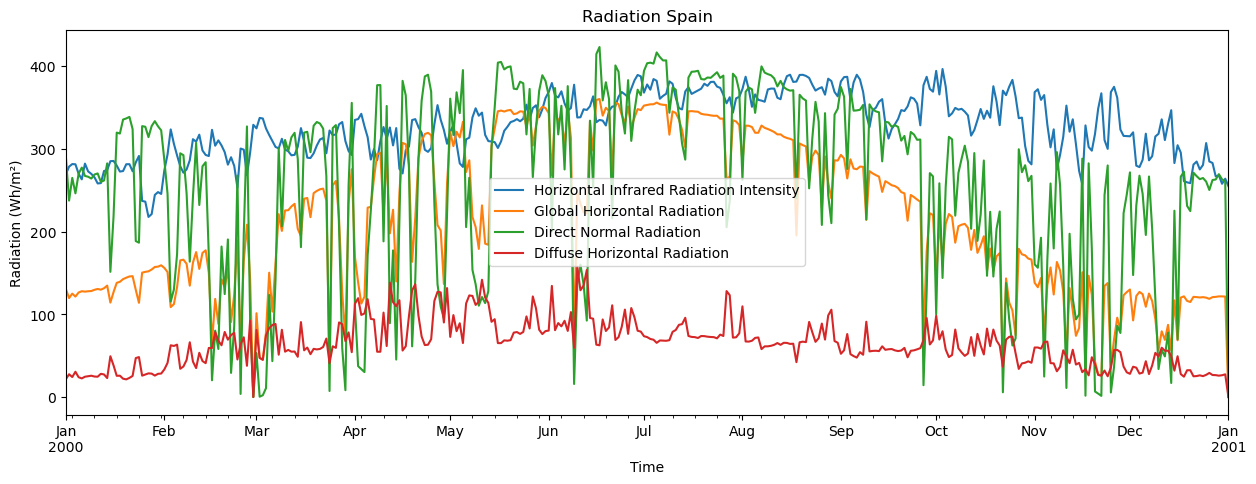

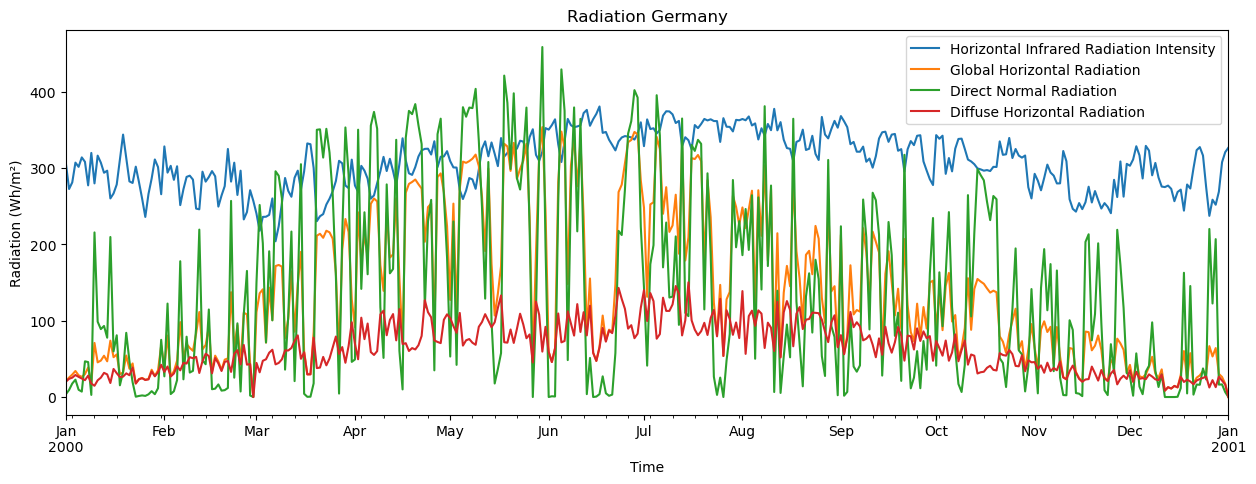

In [ ]:
# Filters the dataframe for the column 'Radiation' and resamples the values with the same day to a mean value 
# Spain
df_2000_clean.filter(like='Radiation').resample("D").mean().plot(
    xlabel='Time',
    ylabel='Radiation in Wh/m²',
    title='Radiation Spain',
    figsize=(15,5))
# Germany
df_2_2000_clean.filter(like='Radiation').resample("D").mean().plot(
    xlabel='Time',
    ylabel='Radiation in Wh/m²',
    title='Radiation' + ' Germany',
    figsize=(15,5))

In [ ]:
# Calculates the sum of the radiation columns in the dataframe in Wh/(m² year)
total_radiation_per_year =[df_2000_clean.filter(like='Radiation').sum(),
                           df_2_2000_clean.filter(like='Radiation').sum()]
print(total_radiation_per_year)

[Horizontal Infrared Radiation Intensity    2872449.67
Global Horizontal Radiation                1890188.00
Direct Normal Radiation                    2262582.91
Diffuse Horizontal Radiation                569599.00
dtype: float64, Horizontal Infrared Radiation Intensity    2706883.87
Global Horizontal Radiation                1222408.00
Direct Normal Radiation                    1217385.03
Diffuse Horizontal Radiation                563231.00
dtype: float64]


In [ ]:
# Calculates the mean of the radiation columns in the dataframe in Wh/(m² year)
df_2_2000_clean.filter(like='Radiation').mean()

Horizontal Infrared Radiation Intensity    309.005008
Global Horizontal Radiation                139.544292
Direct Normal Radiation                    138.970894
Diffuse Horizontal Radiation                64.295776
dtype: float64

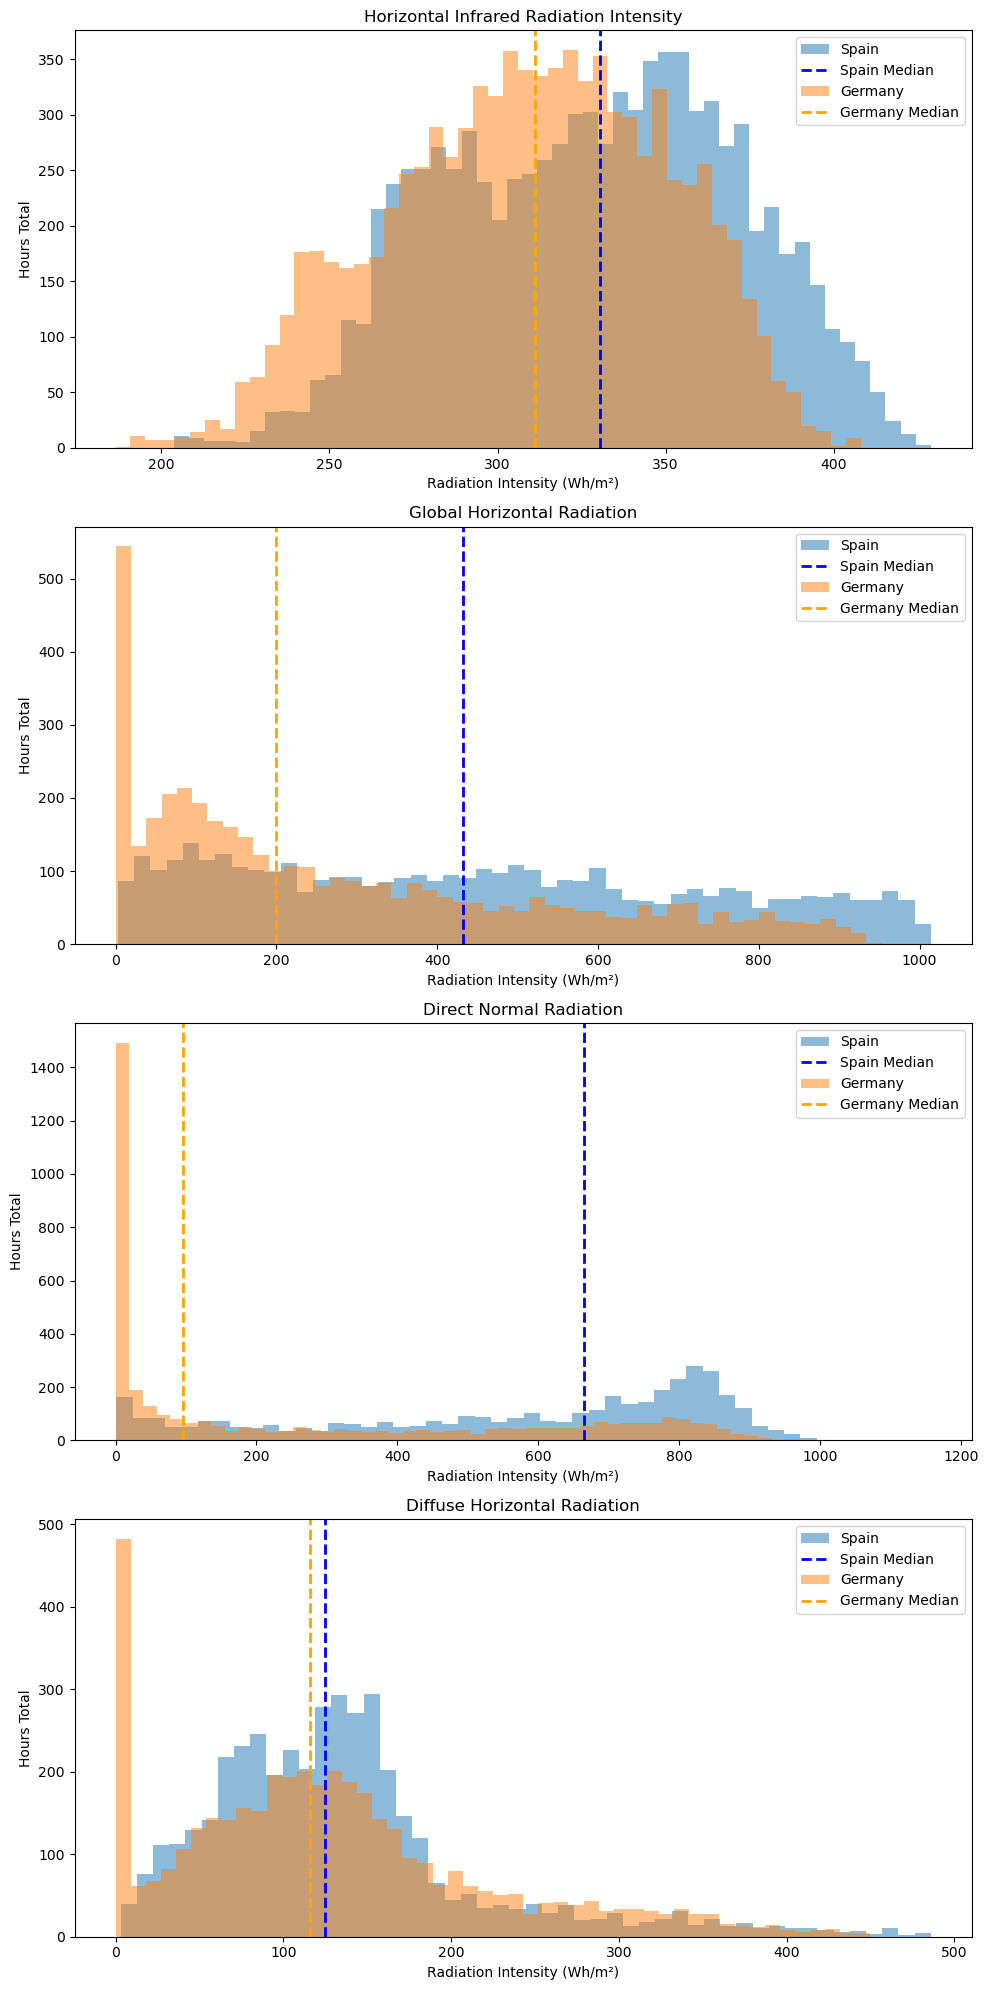

In [ ]:
# New Vairable for the column names in the dataframe
radiation_column_names = df_2000_clean.filter(like='Radiation')
# Columns that contain the word 'Radiation' and rows > 1
radiation_columns = df_2000_clean.filter(like='Radiation')[radiation_column_names > 1]
radiation_columns_2 = df_2_2000_clean.filter(like='Radiation')[radiation_column_names > 1]
# Calculation of the median for Spain and Germany
median_radiation = radiation_columns.quantile(0.5)
median_radiation_2 = radiation_columns_2.quantile(0.5)
# Calculation of the quantile for Spain and Germany
quantile_radiation = radiation_columns.quantile([0.25, 0.75])

# Number of radiation columns
num_rows = len(radiation_columns.columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows,
                         ncols=1,
                         figsize=(10, 5 * num_rows))

# Plot histograms for each radiation column
for i, column in enumerate(radiation_columns.columns):
    ax = axes[i]
    # Plot histograms for each radiation column in total 50 bins
    radiation_columns[column].plot.hist(ax=ax,bins=50, alpha=0.5)
    ax.axvline(median_radiation[column],
               color='blue',
               linestyle='dashed',
               linewidth=2,
               label=f'Spain Mean: {median_radiation[column]:.2f}')
    radiation_columns_2[column].plot.hist(ax=ax, bins=50, alpha=0.5)
    ax.axvline(median_radiation_2[column],
               color='orange',
               linestyle='dashed',
               linewidth=2,
               label=f'Spain Mean: {median_radiation_2[column]:.2f}')
    ax.set_ylabel('Hours Total')
    ax.set_xlabel('Radiation Intensity in Wh/m²')
    ax.set_title(f'{column}')
    ax.legend(['Spain', 'Spain Median', 'Germany', 'Germany Median'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()